## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Dataset

In [4]:
df1 = pd.read_csv(r"D:\Livstream\Unemployment_Analysis\dataset\Unemployment in India.csv")
df2 = pd.read_csv(r"D:\Livstream\Unemployment_Analysis\dataset\Unemployment_Rate_upto_11_2020.csv")


## Quick Data Check

In [5]:
df1.head()
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df2.head()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


## Data Cleaning (Both)

In [7]:
df1.isnull().sum()
df2.isnull().sum()


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [10]:
df1.ffill(inplace=True)
df2.ffill(inplace=True)
df1.isnull().sum()
df2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

## Date Column Fix 

In [13]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])


C:\Users\omesh\AppData\Local\Temp\ipykernel_40868\884060686.py:4: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date'] = pd.to_datetime(df1['Date'])
C:\Users\omesh\AppData\Local\Temp\ipykernel_40868\884060686.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date'] = pd.to_datetime(df2['Date'])


## Overall Unemployment Trend

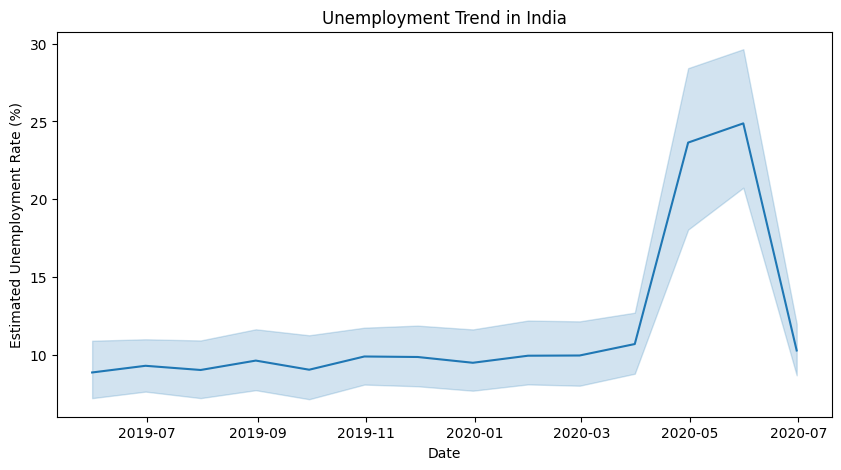

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df1, x='Date', y='Estimated Unemployment Rate (%)')
plt.title("Unemployment Trend in India")
plt.show()
plt.figure(figsize=(10,5))


## Covid Impact Analysis

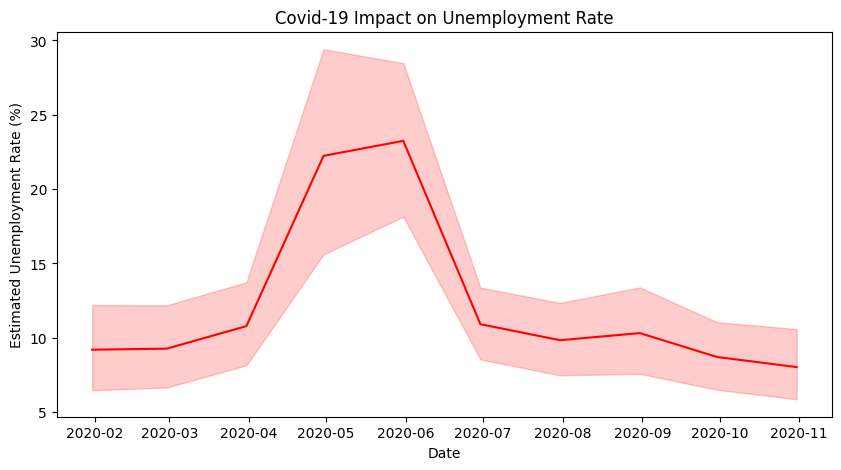

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df2, x='Date', y='Estimated Unemployment Rate (%)', color='red')
plt.title("Covid-19 Impact on Unemployment Rate")
plt.show()
plt.figure(figsize=(10,5))

## Urban vs Rural

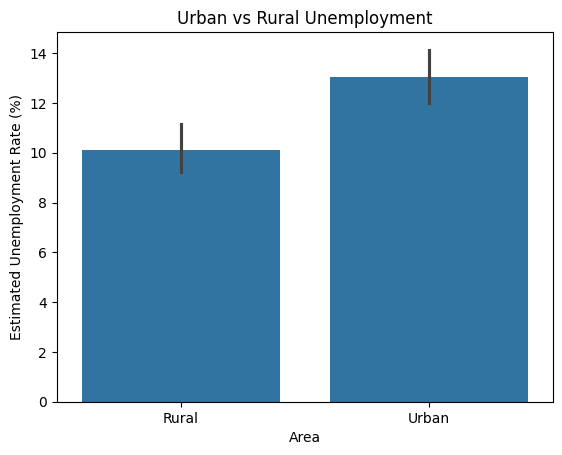

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [19]:
sns.barplot(x='Area', y='Estimated Unemployment Rate (%)', data=df1)
plt.title("Urban vs Rural Unemployment")
plt.show()
plt.figure(figsize=(10,5))


## Seasonal Pattern Analysis 

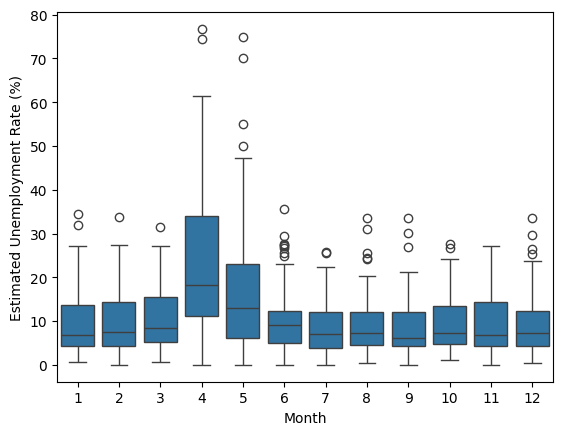

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [21]:
df1['Month'] = df1['Date'].dt.month

sns.boxplot(x='Month', y='Estimated Unemployment Rate (%)', data=df1)
plt.show()
plt.figure(figsize=(10,5))
